In [33]:
import pandas as pd
import numpy as np 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
df = pd.read_excel("Bike Sales Dashboard.xlsx")
df.head()


,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [34]:
df.tail()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No
999,12121,Single,Male,60000,3,High School,Professional,Yes,2,More than 10 Miles,North America,53,Middle Age,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Martial Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Age Brackets      1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [36]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [37]:
df.shape

(1000, 14)

In [38]:
df.columns

Index(['ID', 'Martial Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')

In [39]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [40]:
df.isna().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [41]:
warnings.filterwarnings('ignore')

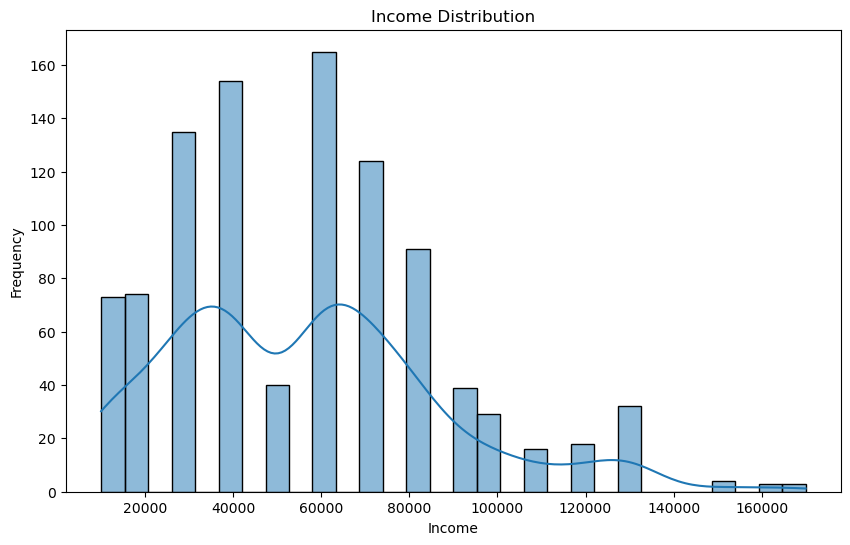

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


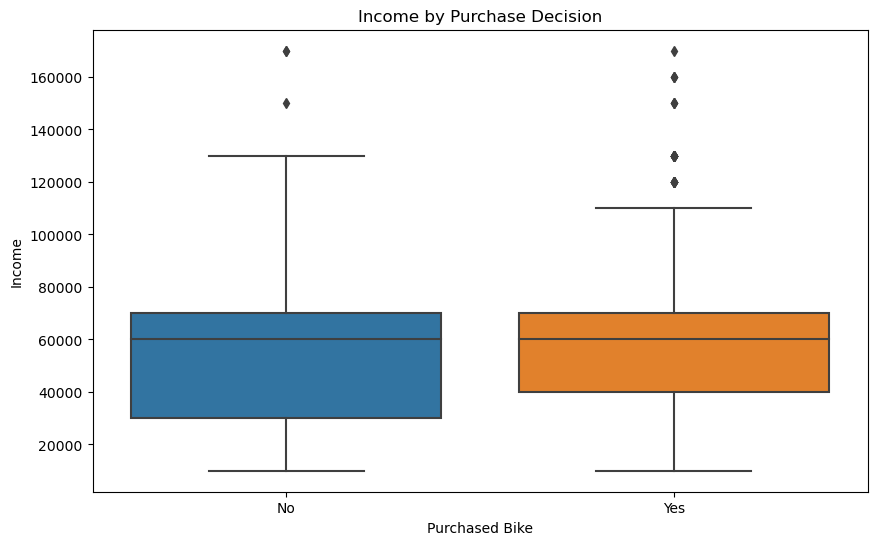

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased Bike', y='Income', data=df)
plt.title('Income by Purchase Decision')
plt.xlabel('Purchased Bike')
plt.ylabel('Income')
plt.show()

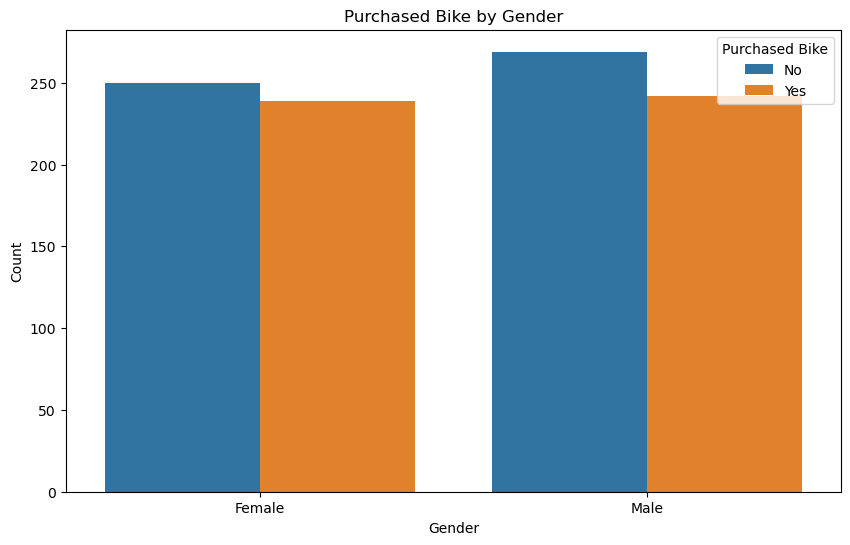

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchased Bike', data=df)
plt.title('Purchased Bike by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

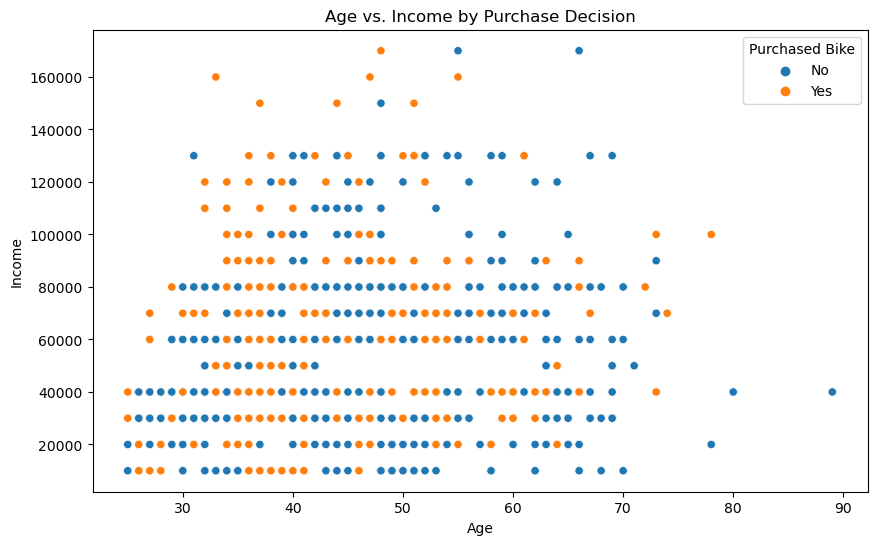

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Purchased Bike', data=df)
plt.title('Age vs. Income by Purchase Decision')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [46]:
bikes = df.drop("ID", axis=1)

In [47]:
bikes.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [48]:
bikes["Purchased Bike"] = [1 if i == "Yes" else 0 for i in bikes["Purchased Bike"]]
bikes["Martial Status"] = [1 if i == "Married" else 0 for i in bikes["Martial Status"]]
bikes["Gender"] = [1 if i == "Male" else 0 for i in bikes["Gender"]]
bikes["Home Owner"] = [1 if i == "Yes" else 0 for i in bikes["Home Owner"]]

In [49]:
bikes.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,Middle Age,0
1,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,Middle Age,0
2,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,Old,0
3,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,Middle Age,1
4,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,Middle Age,1


In [50]:
bikes.drop_duplicates(inplace=True)

In [51]:
distance_mapping = {'0-1 Miles': 1, '1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, 'More than 10 Miles': 5}
bikes['Commute Distance'] = bikes['Commute Distance'].map(distance_mapping)

In [52]:
age_mapping = {'Adolescent': 1, 'Old': 3, 'Middle Age': 2}
bikes["Age Brackets"] = bikes["Age Brackets"].map(age_mapping)


In [53]:
bikes = pd.get_dummies(bikes)

In [60]:
sns.heatmap(bikes.drop("Purchased Bike", axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax[1])
ax[1].set_title("Feature Correlation Heatmap")


Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [61]:
bikes.head()

,Martial Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Age Brackets,Purchased Bike,...,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific
0,1,0,40000,1,1,0,1,42,2,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,30000,3,1,1,1,43,2,0,...,1,0,1,0,0,0,0,1,0,0
2,1,1,80000,5,0,2,3,60,3,0,...,1,0,0,0,0,1,0,1,0,0
3,0,1,70000,0,1,1,4,41,2,1,...,0,0,0,0,0,1,0,0,0,1
4,0,1,30000,0,0,0,1,36,2,1,...,0,0,1,0,0,0,0,1,0,0


In [62]:
X = bikes.drop(["Purchased Bike"], axis=1)
y = bikes["Purchased Bike"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
rf = RandomForestClassifier(random_state=42)


In [66]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [67]:
random_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_iter=20, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [68]:
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Best score: 0.6736842105263159


In [69]:
rf_optimized = RandomForestClassifier(**random_search.best_params_)
rf_optimized.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10)

In [70]:
y_pred = rf_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Test Accuracy: 0.7172774869109948
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        98
           1       0.72      0.68      0.70        93

    accuracy                           0.72       191
   macro avg       0.72      0.72      0.72       191
weighted avg       0.72      0.72      0.72       191



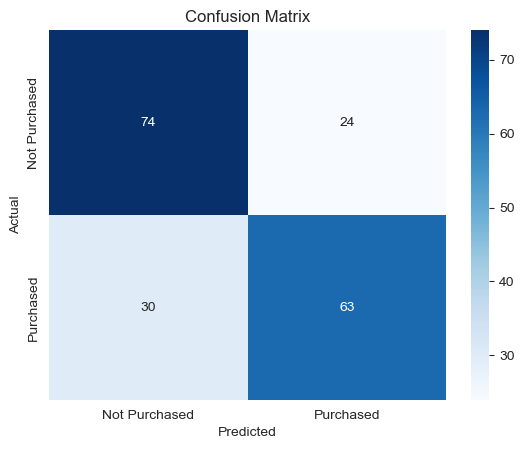

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [73]:
random_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_iter=30, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score on training set:", random_search.best_score_)

Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40}
Best score on training set: 0.6802631578947368


In [74]:
rf_optimized = RandomForestClassifier(**random_search.best_params_)
rf_optimized.fit(X_train, y_train)

y_pred = rf_optimized.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7172774869109948
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        98
           1       0.72      0.69      0.70        93

    accuracy                           0.72       191
   macro avg       0.72      0.72      0.72       191
weighted avg       0.72      0.72      0.72       191



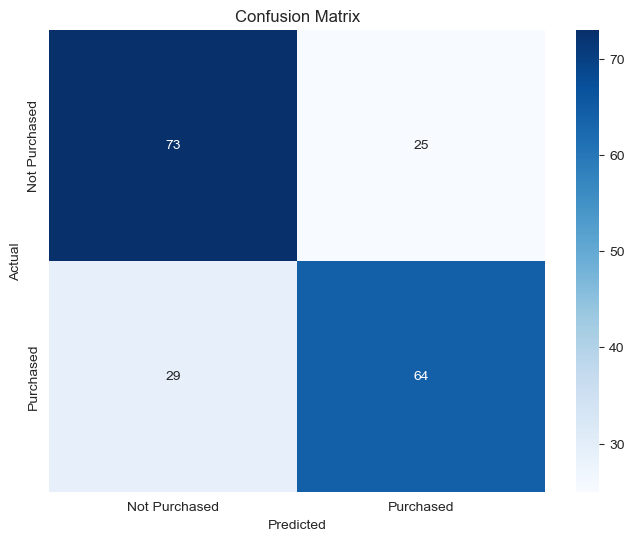

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()